In [1]:
import os

In [2]:
import numpy as np
import pandas as pd

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk(".", topdown=False): 
    for name in files:
        path = os.path.join(root, name)
        if path.endswith("jpg"): # We want only the images
            imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a jpg image was loaded
print(imagepaths[0])

84
.\00_Fort_Aguada_final\frame_00_1.jpg


In [5]:
def plot_image(path):
    img_cvt = cv2.imread(path) # Reads the image into a numpy.array
#     img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
    print(img_cvt.shape) # Prints the shape of the image just to check
    plt.grid(False) # Without grid so we can see better
    plt.imshow(img_cvt) # Shows the image
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Image " + path)

(240, 256, 3)


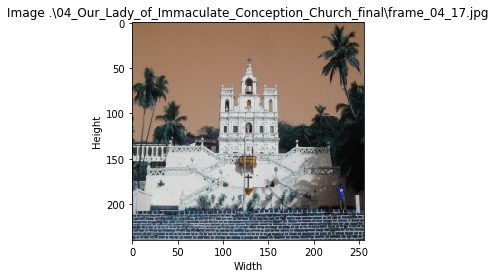

In [6]:
plot_image(imagepaths[74]) #We plot the first image from our imagepaths array

.\00_Fort_Aguada_final\frame_00_1.jpg

In [7]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
    img = cv2.imread(path) # Reads image and returns np.array
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
#     img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
    X.append(img)
    
    # Processing label in image path
    category = path.split('\\')[2]
    label = int(category.split("_")[1][1]) # We need to convert 10_down to 00_down, or else it crashes
    y.append(label)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 240, 256, 3) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  84
Labels loaded:  84
0 .\00_Fort_Aguada_final\frame_00_1.jpg


In [8]:
print(X.shape)
print(y.shape)

(84, 240, 256, 3)
(84,)


In [9]:
from sklearn.model_selection import train_test_split

In [28]:
ts = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(71, 240, 256, 3) (71,)
(13, 240, 256, 3) (13,)


In [16]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [12]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [39]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(240, 256, 3))) 
model.add(MaxPool2D((3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 236, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 78, 84, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 76, 82, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 38, 41, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 36, 39, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 18, 19, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 21888)            

In [40]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [41]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=2, validation_data=(X_test, y_test))

Train on 71 samples, validate on 13 samples
Epoch 1/50
 - 1s - loss: 121.3950 - accuracy: 0.1549 - val_loss: 6.1793 - val_accuracy: 0.3077
Epoch 2/50
 - 0s - loss: 6.0349 - accuracy: 0.2958 - val_loss: 1.3158 - val_accuracy: 0.5385
Epoch 3/50
 - 0s - loss: 1.5805 - accuracy: 0.4789 - val_loss: 1.2139 - val_accuracy: 0.6923
Epoch 4/50
 - 0s - loss: 1.0106 - accuracy: 0.6197 - val_loss: 0.8623 - val_accuracy: 0.6923
Epoch 5/50
 - 0s - loss: 0.4112 - accuracy: 0.9014 - val_loss: 0.5658 - val_accuracy: 0.7692
Epoch 6/50
 - 0s - loss: 0.5004 - accuracy: 0.8732 - val_loss: 1.1612 - val_accuracy: 0.3846
Epoch 7/50
 - 0s - loss: 0.2847 - accuracy: 0.9296 - val_loss: 0.3652 - val_accuracy: 0.9231
Epoch 8/50
 - 0s - loss: 0.1586 - accuracy: 0.9718 - val_loss: 0.9620 - val_accuracy: 0.6154
Epoch 9/50
 - 0s - loss: 0.1409 - accuracy: 0.9577 - val_loss: 0.7390 - val_accuracy: 0.6154
Epoch 10/50
 - 0s - loss: 0.0475 - accuracy: 1.0000 - val_loss: 1.2377 - val_accuracy: 0.5385
Epoch 11/50
 - 0s - los